In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyndamics3 import Simulation
from sci378 import *

pyndamics3  version  0.0.29
Version:  0.0.18


In [4]:
data=pd.read_excel('Mobile telephone service.xlsx')
data

,Year,Americans with Cellular Service (%)
0,1995,12.690
1,1996,16.350
2,1997,20.290
3,1998,25.080
4,1999,30.810
5,2000,38.750
6,2001,45.000
7,2002,49.160
8,2003,55.150
9,2004,62.852


In [9]:
t=data['Year']
x=data['Americans with Cellular Service (%)']
t=t-min(t)  # this data doesn't start at t=0, so adjust

Text(1, 90, '$x=K$ fixed point (stable)')

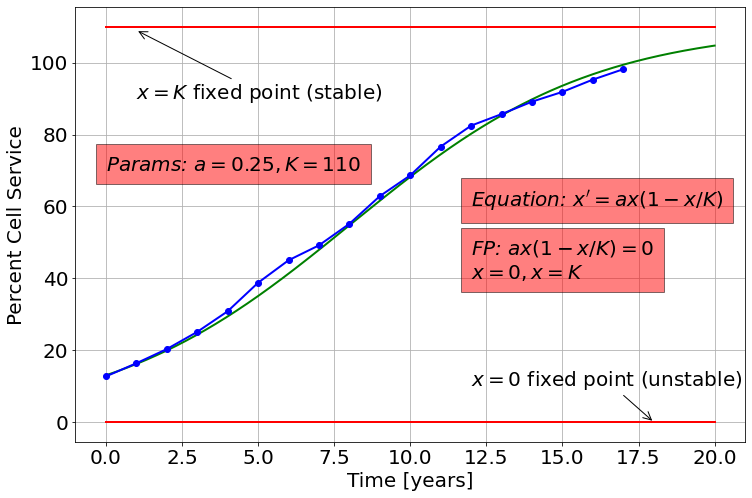

In [52]:
sim=Simulation()
sim.add("x' = a*x*(1-x/K)",13)
sim.params(a=.25,K=110)
sim.run(20)

plot(sim.t,sim.x,'g-')
plot(t,x,'bo-')

# plot the x=0 fixed point
sim=Simulation()
sim.add("x' = a*x*(1-x/K)",0)
sim.params(a=.25,K=110)
sim.run(20)
plot(sim.t,sim.x,'r-')


# plot the x=K fixed point
sim=Simulation()
sim.add("x' = a*x*(1-x/K)",110)
sim.params(a=.25,K=110)
sim.run(20)
plot(sim.t,sim.x,'r-')

xlabel('Time [years]')
ylabel('Percent Cell Service')


# probably easier to do this in powerpoint, but this gives you the idea

text(12, 60, "Equation: $x'=ax(1-x/K)$", style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
text(12, 40, "FP: $ax(1-x/K)=0$\n$x=0,x=K$", style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
text(0, 70, "Params: $a=0.25, K=110$", style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})


annotate('$x=0$ fixed point (unstable)',(18,0),xytext=(12,10), arrowprops=dict(arrowstyle="->"))
annotate('$x=K$ fixed point (stable)',(1,109),xytext=(1,90), arrowprops=dict(arrowstyle="->"))

In [23]:
annotate?

Signature: annotate(text, xy, *args, **kwargs)
Docstring:
Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
text : str
    The text of the annotation.

xy : (float, float)
    The point *(x, y)* to annotate. The coordinate system is determined
    by *xycoords*.

xytext : (float, float), default: *xy*
    The position *(x, y)* to place the text at. The coordinate system
    is determined by *textcoords*.

xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'

    The coordinate system that *xy* is given in. The following types
    of values are supported:

    - One of the following strings:

      ==================== ============================================
      Value                Description
      =======